In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections

from utils import *

%matplotlib inline
# !pip install matplotlib
# !pip install pandas
# !pip install seaborn

### Descrição dos dados

**NUMERO_BOLETIM**: Número do Boletim de Ocorrência, exemplo: 206099 ou 2016-000009920-001

**DATA_BOLETIM**: Data do acidente registrada no Boletim de ocorrência. Exemplo: 24/4/1999

**HORA_BOLETIM**: Hora do acidente registrada no Boletim de ocorrência. Exemplo: 18:10:00

**DATA_INCLUSAO**: Data do registro do boletim de ocorrência.

**HORA_INCLUSAO**: Hora do registro do boletim de ocorrência.

**TIPO_ACIDENTE**: Codigo do tipo de acidente. Exemplo: H01001 - abalroamento sem vitima.

**DESC_TIPO_ACIDENTE**: Descricao do tipo de acidente.

**COD_TEMPO**: Codigo da condicao climatica no momento do acidente. Exemplo: 2 - Chuva.

**DESC_TEMPO**: Calculado a partir de COD_TEMPO.

**COD_PAVIMENTO**: Codigo do pavimento do logradouro. Exemplo: 1 - asfalto.

**PAVIMENTO**: Calculado a partir de COD_PAVIMENTO.

**COD_REGIONAL**: Numero da administracao regional. Ex.: 18 (Barreiro).

**DESC_REGIONAL**: Calculado a partir de COD_REGIONAL.

**ORIGEM_BOLETIM**: Nome do Batalhão da PM onde foi registrado o Boletim de Ocorrência.

**LOCAL_SINALIZADO**: Indica se o local do acidente é sinalizado.

**VELOCIDADE_PERMITIDA**: Velocidade máxima permitida para o local do acidente. Exemplo: 40.

**COORDENADA_X**: Coordenada x do endereco referenciado no Boletim de Ocorrencia (UTM - Sirgas 2000 fuso 23S).

**COORDENADA_Y**: Coordenada y do endereco referenciado no Boletim de Ocorrencia  (UTM - Sirgas 2000 fuso 23S).

**HORA_INFORMADA**: Indicador de hora informada.

**INDICADOR_FATALIDADE**:Indicada se no acidente houve vitima fatal.

**VALOR_UPS**: Valor de unidade padrão de severidade.

**DESCRICAO_UPS**: Calculado a partir de "VALOR_UPS" Valor de unidade padrão de severidade. Valores possíveis: 
    * 1 - sem vítima, 
    * 5 - com vítima (não fatal),
    * 13 - com vítima (fatal).

In [2]:
# new_file = open('./si-2021.csv', "r+")
# with open('./si-bol-2021.csv', encoding='utf-8') as file: 
#     for i in file:
# #         print(i)
#         new_file.write(i.replace(";", ","))
    
# new_file.close()

df_2018 = pd.read_csv('si-2018.csv')
df_2019 = pd.read_csv('si-2019.csv')
df_2020 = pd.read_csv('si-2020.csv')
df_2021 = pd.read_csv('si-2021.csv')

mes_2018 = []
mes_2019 = []
mes_2020 = []
mes_2021 = []


for i in df_2018['DATA_BOLETIM']:
    aux = i.split("/")
    mes_2018.append(aux[1])

for i in df_2019['DATA_BOLETIM']:
    aux = i.split("/")
    mes_2019.append(aux[1])
    
for i in df_2020['DATA_BOLETIM']:
    aux = i.split("/")
    mes_2020.append(aux[1])
    
for i in df_2021['DATA_BOLETIM']:
    aux = i.split("/")
    mes_2021.append(aux[1])
        
        
mes_2018 = np.sort(mes_2018)
mes_2019 = np.sort(mes_2019)
mes_2020 = np.sort(mes_2020)
mes_2021 = np.sort(mes_2021)

acidentes_2018 = num_acidentes(mes_2018)
acidentes_2019 = num_acidentes(mes_2019)
acidentes_2020 = num_acidentes(mes_2020)
acidentes_2021 = num_acidentes(mes_2021)


## Histograma

### Informações da quantidade de acidentes de acordo com o nível de severidade

In [23]:
# plt.figure(figsize=(8,4))
# sns.scatterplot(data=df_2018, x=lista, y='desc_severidade', hue='data_boletim')
# plt.show()

# order = ['NAO FATAL', 'SEM FERIMENTOS', 'NAO INFORMADO', 'FATAL']

# fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14,10))
# fig.tight_layout(pad=4)
# a = sns.histplot(data=df_2018, bins=12, x=mes_2018, hue='desc_severidade', hue_order=order, multiple='dodge', shrink=0.8, ax=axes[0])
# b = sns.histplot(data=df_2021, bins=12, x=mes_2021, hue='desc_severidade', hue_order=order, multiple='dodge', shrink=0.8, ax=axes[1])
# sns.move_legend(a, 'lower center', bbox_to_anchor=(.5, 1), ncol=4, title='2018', frameon=False)
# sns.move_legend(b, 'lower center', bbox_to_anchor=(.5, 1), ncol=4, title='2021', frameon=False)

# plt.show()

## Gráfico de barras

### Informações da quantidade de acidentes 

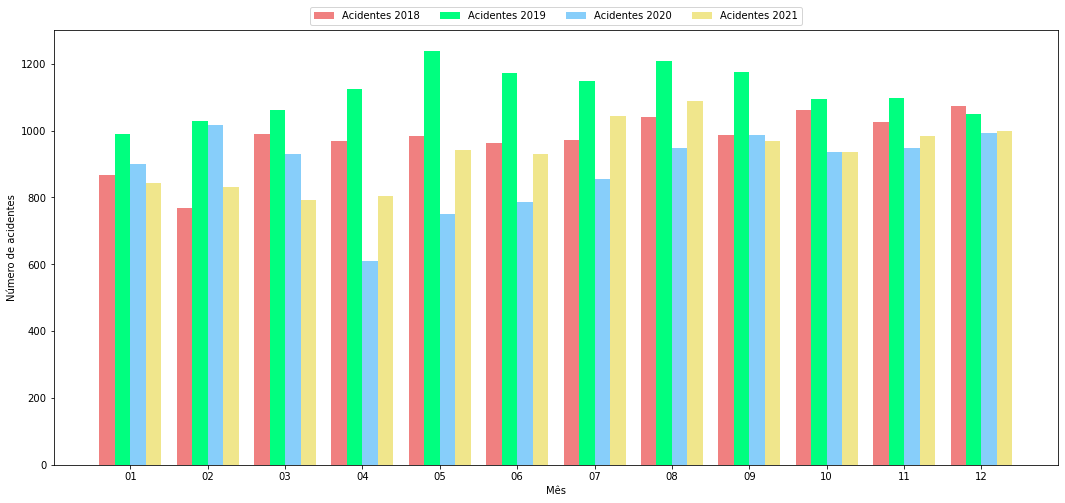

In [3]:
x = np.array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'])

X_axis = np.arange(len(x))

y_2018 = acidentes_2018
y_2019 = acidentes_2019
y_2020 = acidentes_2020
y_2021 = acidentes_2021

plt.figure(figsize=(18,8))

plt.bar(X_axis - 0.3, y_2018, 0.2, label= 'Acidentes 2018', color=['lightcoral'])
plt.bar(X_axis - 0.1, y_2019, 0.2, label= 'Acidentes 2019', color=['springgreen'])
plt.bar(X_axis + 0.1, y_2020, 0.2, label= 'Acidentes 2020', color=['lightskyblue'])
plt.bar(X_axis + 0.3, y_2021, 0.2, label= 'Acidentes 2021', color=['khaki'])

plt.xticks(X_axis, x)
plt.xlabel("Mês")
plt.ylabel("Número de acidentes")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=4)

plt.show()

## Datas comemorativas
* 2018 -> https://www.contabilistassl.com.br/s-n/noticias-descricao.php?id_=OTQ2NzU0ODQyMTk=&o=fc9dc22ccbf2965c1a1d85a3cbd28b7350bdb810c1e057a784da89fe6bfb769aa23f5bc5b4ddf58276c13c4cb08b499dc9277c4de4570429963e77e6e9ebfc84
* 2019 -> https://www.belohorizonte.com.br/quais-os-feriados-em-belo-horizonte-no-ano-de-2019/
* 2020 -> https://www.belohorizonte.com.br/quais-os-feriados-em-belo-horizonte-no-ano-de-2020/
* 2021 -> https://www.belohorizonte.com.br/quais-os-feriados-em-belo-horizonte-no-ano-de-2021/


### Carnaval
* 13/02 - 2018 - Terça-feira
* 05/03 - 2019 - Terça-feira
* 25/02 - 2020 - Terça-feira
* 16/02 - 2021 - Terça-feira


### Pascoa
* 01/04 - 2018 - Domingo
* 21/04 - 2019 - Domingo
* 12/04 - 2020 - Domingo
* 04/04 - 2021 - Domingo

### Natal
* 25/12 - 2018 - Terça-feira
* 25/12 - 2019 - Quarta-feira
* 25/12 - 2020 - Sexta-feira
* 25/12 - 2021 - Sábado

### Aniversário de Belo Horizonte
* 12/12 - 2018 - Quarta-feira
* 12/12 - 2019 - Quinta-feira
* 12/12 - 2020 - Sábado
* 12/12 - 2021 - Domingo


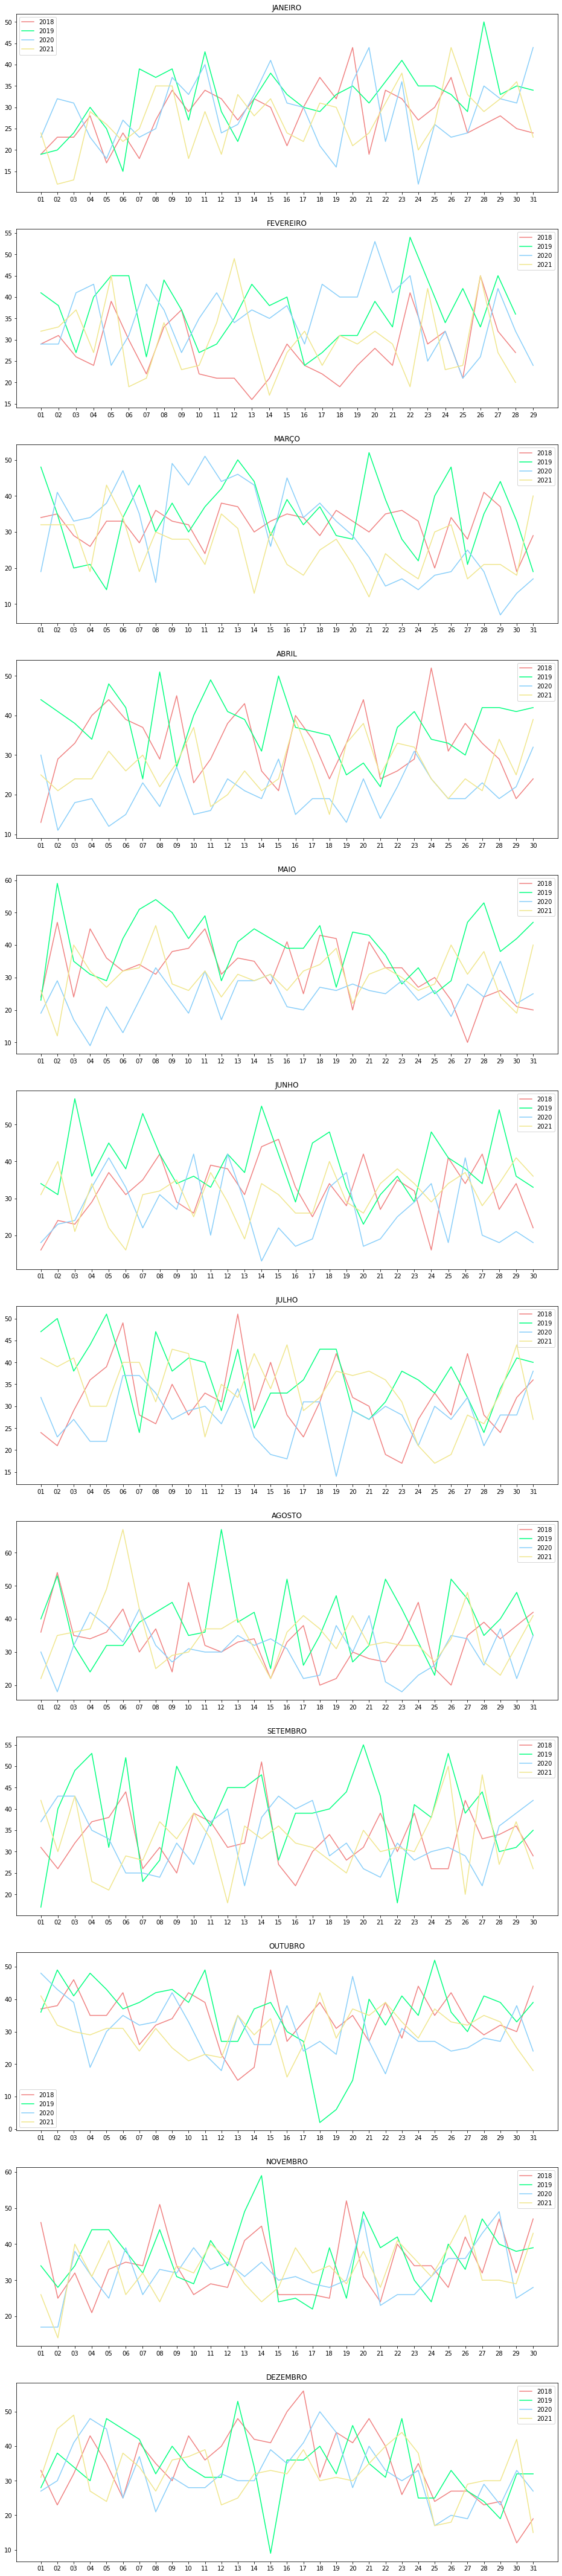

In [6]:
meses_2018 = acidentes_dia_mes(df_2018)
meses_2019 = acidentes_dia_mes(df_2019)
meses_2020 = acidentes_dia_mes(df_2020)
meses_2021 = acidentes_dia_mes(df_2021)

x_2018, y_2018 = get_x_y(meses_2018)
x_2019, y_2019 = get_x_y(meses_2019)
x_2020, y_2020 = get_x_y(meses_2020)
x_2021, y_2021 = get_x_y(meses_2021)

fig, ax = plt.subplots(12, 1, figsize=(14,60))
fig.tight_layout(pad=4)

#create subplots
nome_mes = ['JANEIRO', 'FEVEREIRO', 'MARÇO', 'ABRIL', 'MAIO', 'JUNHO',
           'JULHO', 'AGOSTO', 'SETEMBRO', 'OUTUBRO', 'NOVEMBRO', 'DEZEMBRO']

for i in range(12):
    ax[i].plot(x_2018[i], y_2018[i], color='lightcoral', label="2018")
    ax[i].plot(x_2019[i], y_2019[i], color='springgreen', label="2019")
    ax[i].plot(x_2020[i], y_2020[i], color='lightskyblue', label="2020")
    ax[i].plot(x_2021[i], y_2021[i], color='khaki', label="2021")
    ax[i].set_title(nome_mes[i])
    ax[i].legend()

plt.show()



In [7]:
# Fazer agora analise dos acidentes por horarios do dia